# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Mount the drive and read the dataset

In [2]:
%cd /content/drive/MyDrive/Course Material/Text Classification- Sentiment Analysis

/content/drive/MyDrive/Course Material/Text Classification- Sentiment Analysis


In [2]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.shape

(14640, 15)

# Select the most relevent columns

In [4]:
df = df[['airline_sentiment', 'text']]

In [5]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Change column names to labels and text

In [6]:
df.columns = ['labels', 'text']

In [7]:
df.head()

,labels,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Check if the dataset is unbalanced

In [8]:
df['labels'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: labels, dtype: int64

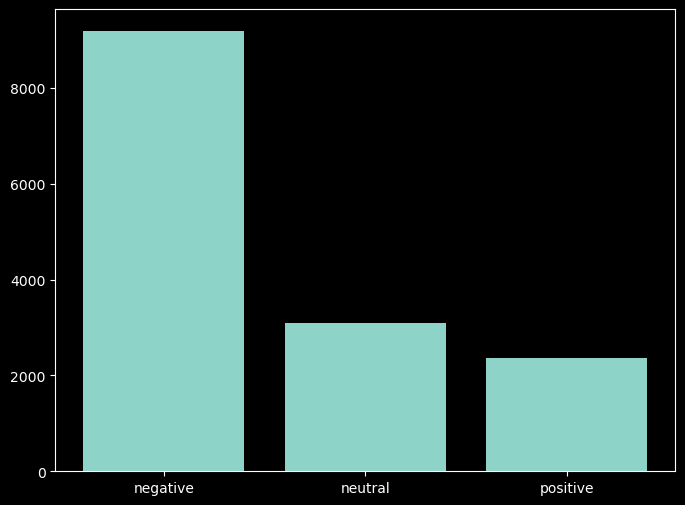

In [9]:
plt.figure(figsize = (8,6))
x, y = np.unique(df['labels'], return_counts=True)
plt.bar(x, y, align='center')
plt.gca().set_xticks(x)
plt.show()

# Change labels into number

In [12]:
df['labels'] = df['labels'].map({'negative': 0, 'positive': 1, 'neutral': 2})

In [13]:
df.head()

,labels,text
0,2,@VirginAmerica What @dhepburn said.
1,1,@VirginAmerica plus you've added commercials t...
2,2,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...


# Check the null values

In [14]:
df.isnull().any()

,0
labels,False
text,False


# Extract features and labels from the dataset

In [15]:
features = df['text']
labels = df['labels']

# Splt the data into training and testing

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Map the text into numbers usingTfidf Vectorizer

In [17]:
featurizer = TfidfVectorizer()
Xtrain = featurizer.fit_transform(train_data)
Xtest = featurizer.transform(test_data)

# Instantiate Logistic Regression and train the model

In [18]:
model = LogisticRegression(max_iter = 500)
model.fit(Xtrain, train_labels)

LogisticRegression(max_iter=500)

# Get the prediction from the model

In [19]:
y_pred = model.predict(Xtest)

# Create Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

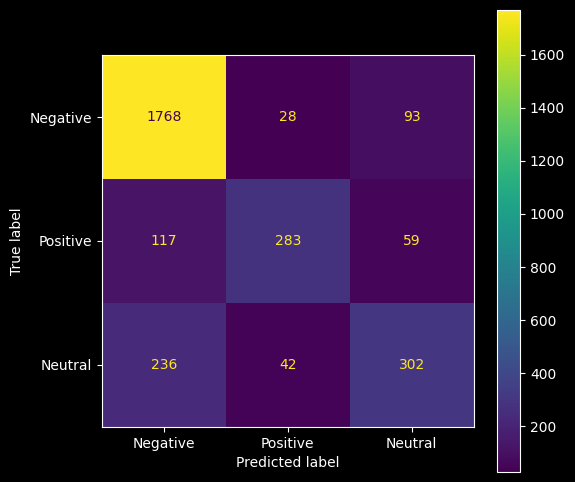

In [21]:
cm = confusion_matrix(test_labels,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Negative','Positive','Neutral'])
disp.plot(xticks_rotation=0)
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

In [ ]:
# confusion matrix shows that model is biased towards negative class

# Calculate Accuracy, Precision, Recall and F1_Score

In [22]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

In [23]:
print("Accuracy : %2.2f" % (accuracy_score(test_labels, y_pred, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, y_pred, average = 'macro')))
print("Recall : %2.2f" % (recall_score(test_labels, y_pred, average = 'macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, y_pred, average = 'macro')))

Accuracy : 0.80
Precision : 0.77
Recall : 0.69
F1_Score : 0.72


In [24]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1889
           1       0.80      0.62      0.70       459
           2       0.67      0.52      0.58       580

    accuracy                           0.80      2928
   macro avg       0.77      0.69      0.72      2928
weighted avg       0.80      0.80      0.79      2928



# Check the model performance

In [25]:
tweet = "Slow service"

In [26]:
tweet = featurizer.transform([tweet])

In [27]:
model.predict(tweet)

array([0])

In [28]:
tweet2 = "Good food"

In [29]:
tweet2 = featurizer.transform([tweet2])

In [30]:
model.predict(tweet2)

array([1])

In [31]:
tweet3 = "I can't say"

In [32]:
tweet3 = featurizer.transform([tweet3])

In [33]:
model.predict(tweet3)

array([0])